In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [136]:
# configure Seaborn plot style
sns.set(rc={'axes.facecolor': '#ebe8e8'} , style="darkgrid" )


In [137]:
df= pd.read_csv("heart.csv")
df.head()
# sex: Gender of the patient (0: female, 1: male).

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [138]:
# Basic information about dataset
print(df.isnull().sum())
print(df.info())
# There is no missing values - only 'non-null' values 
print(df.describe())
# The average age of the patients is aproximately 54.4 years. Most of patients are men.
# The average resting blood pressure is 131.6 mm Hg
# The average holseterol is 246.3 mg/dl

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
     

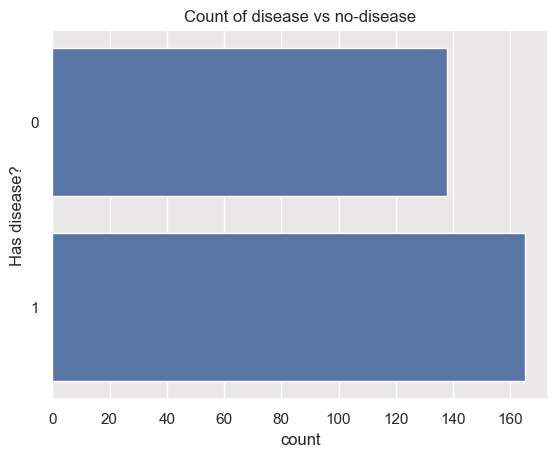

In [139]:
sns.countplot(y='target', data=df)
plt.title('Count of disease vs no-disease')
plt.ylabel('Has disease?')
plt.show()

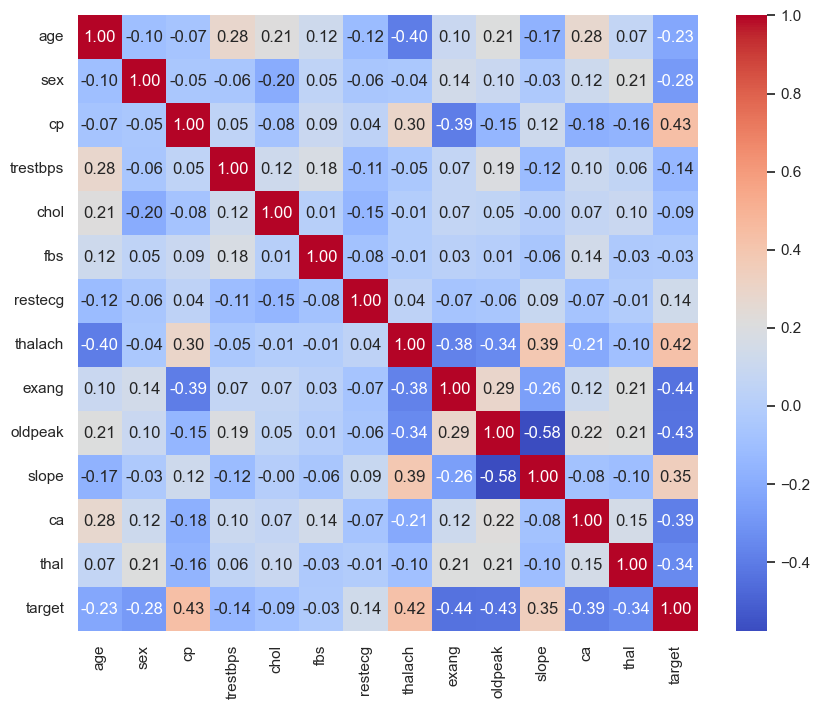

In [182]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Decision Tree

In [141]:
y = df['target']
X = df.drop(['target'], axis=1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
diseaseTree = DecisionTreeClassifier( criterion='gini', max_depth=4 )

In [143]:
diseaseTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [144]:
tree_predictions = diseaseTree.predict(X_test)

In [145]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, tree_predictions))

Decision Tree's Accuracy:  0.8524590163934426


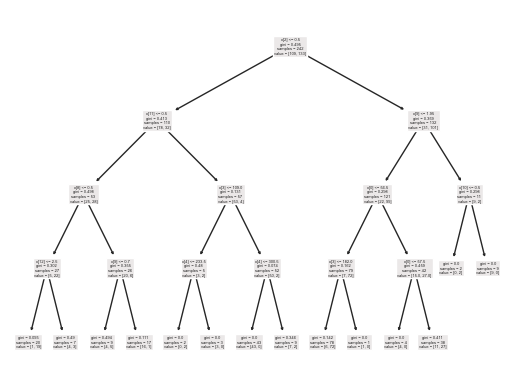

In [146]:
plot_tree(diseaseTree)
plt.show()

In [147]:
# Wybór kolumn
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Skalowanie wartości float
scaler_f = StandardScaler()
scaled_features_f = scaler_f.fit_transform(df[float_columns])
scaled_df_f = pd.DataFrame(scaled_features_f, columns=scaler_f.get_feature_names_out(float_columns))

# Skalowanie wartości int
scaler_i = StandardScaler()
scaled_features_i = scaler_i.fit_transform(df[int_columns])
scaled_df_i = pd.DataFrame(scaled_features_i, columns=scaler_i.get_feature_names_out(int_columns))

# Połączenie danych
scaled_data = pd.concat([df.drop(columns=float_columns + int_columns), scaled_df_f, scaled_df_i], axis=1)
scaled_data

,oldpeak,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,1.087338,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-2.274579,-0.714429,-2.148873,0.914529
1,2.122573,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-2.274579,-0.714429,-0.512922,0.914529
2,0.310912,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.976352,-0.714429,-0.512922,0.914529
3,-0.206705,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,0.976352,-0.714429,-0.512922,0.914529
4,-0.379244,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.724323,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.649113,-0.714429,1.123029,-1.093459
299,0.138373,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.649113,-0.714429,1.123029,-1.093459
300,2.036303,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,-0.649113,1.244593,1.123029,-1.093459
301,0.138373,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,-0.649113,0.265082,1.123029,-1.093459


## One-vs-All

In [148]:
y = df['target']
X = df.drop(['target'], axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
diseaseTree = DecisionTreeClassifier( criterion='gini', max_depth=7 )

In [150]:
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [151]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 88.52%


## One-vs-One

In [152]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [153]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 88.52%


## Random Forest

In [167]:
df2= pd.read_csv("heart.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [168]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest")
print(f"Accuracy: {100*accuracy:.2f}%")

Random Forest
Accuracy: 83.61%


In [189]:
# new patient 
new_patient = pd.DataFrame([[38,1,2,130,300,0,1,187,0,3.5,0,0,2	]], columns=X.columns)
prediction = model.predict(new_patient)
print("Prediction 1:", "Heart disease" if prediction[0] == 1 else "No heart disease")

new_patient2 = pd.DataFrame([[57, 1, 0, 130, 131, 0, 1, 115, 1, 1.2, 1, 1, 3]], columns=X.columns)
prediction2 = model.predict(new_patient2)
print("Prediction 2:", "Heart disease" if prediction2[0] == 1 else "No heart disease")

Prediction 1: Heart disease
Prediction 2: No heart disease
